In [47]:
import cv2
image = cv2.imread(r'C:\Users\varun\Coding\Machine-learning\face_sketches\dataset2\photo\m1-032-01.jpg')  # loads an image from the specified file
# convert an image from one color space to another
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
# sharp edges in images are smoothed while minimizing too much blurring
blur = cv2.GaussianBlur(invert, (21, 21), 0)
invertedblur = cv2.bitwise_not(blur)
sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
cv2.imwrite(r"C:\Users\varun\Coding\Machine-learning\face_sketches\converted_image1.jpg", sketch)  # converted image is saved as mentioned name

True

In [48]:
# Python program to Convert Image into sketch
 
 
# import all the required modules
import numpy as np
import imageio
import scipy.ndimage
import cv2
 
 
# take image input and assign variable to it
img = r'C:\Users\varun\Coding\Machine-learning\face_sketches\dataset2\photo\m1-032-01.jpg'
 
 
# function to convert image into sketch
def rgb2gray(rgb):
    # 2 dimensional array to convert image to sketch
    return np.dot(rgb[..., :3], [0.2989, 0.5870, .1140])
 
 
def dodge(front, back):
 
    # if image is greater than 255 (which is not possible) it will convert it to 255
    final_sketch = front*255/(255-back)
    final_sketch[final_sketch > 255] = 255
    final_sketch[back == 255] = 255
 
    # to convert any suitable existing column to categorical type we will use aspect function
    # and uint8 is for 8-bit signed integer
    return final_sketch.astype('uint8')
 
 
ss = imageio.imread(img)
gray = rgb2gray(ss)
 
i = 255-gray
 
 
# to convert into a blur image
blur = scipy.ndimage.filters.gaussian_filter(i, sigma=13)
 
 
# calling the function
r = dodge(blur, gray)
 
 
cv2.imwrite('converted_image2.jpg', r)

C:\Users\varun\AppData\Local\Temp\ipykernel_15904\3258567327.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ss = imageio.imread(img)
C:\Users\varun\AppData\Local\Temp\ipykernel_15904\3258567327.py:40: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blur = scipy.ndimage.filters.gaussian_filter(i, sigma=13)


True

In [50]:
from __future__ import print_function
from builtins import input
import cv2 as cv
import numpy as np
import argparse


image = cv.imread(r'C:\Users\varun\Coding\Machine-learning\face_sketches\dataset2\photo\\m1-032-01.jpg')
## [basic-linear-transform-load]

## [basic-linear-transform-output]
new_image = np.zeros(image.shape, image.dtype)
## [basic-linear-transform-output]

## [basic-linear-transform-parameters]
alpha = 0.5 # Simple contrast control
beta = 100    # Simple brightness control

# Initialize values
print(' Basic Linear Transforms ')
print('-------------------------')
## [basic-linear-transform-parameters]

# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
## [basic-linear-transform-operation]
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

 Basic Linear Transforms 
-------------------------


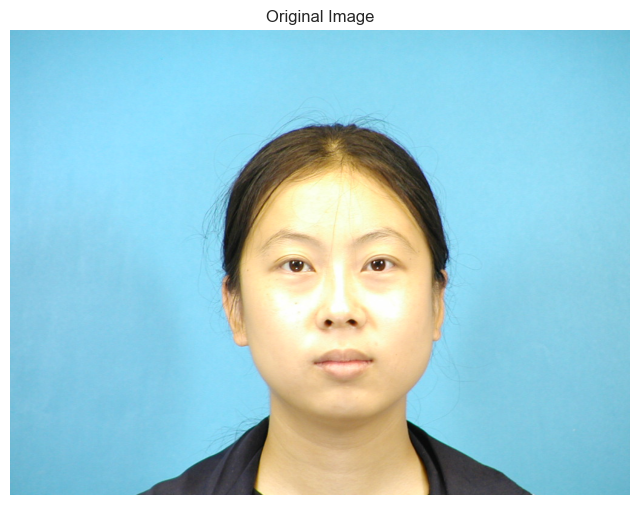

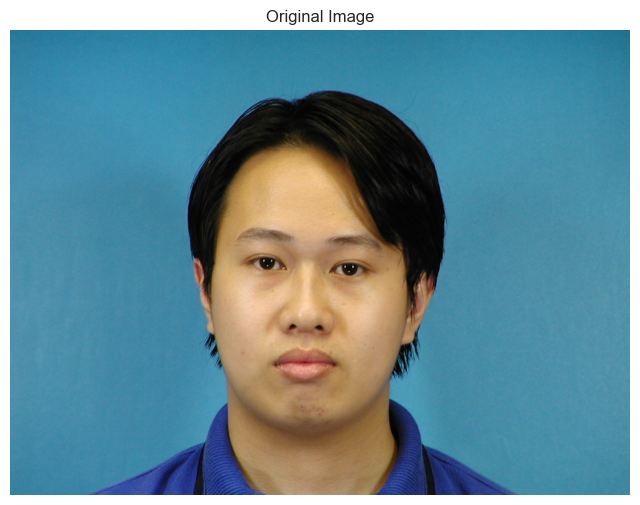

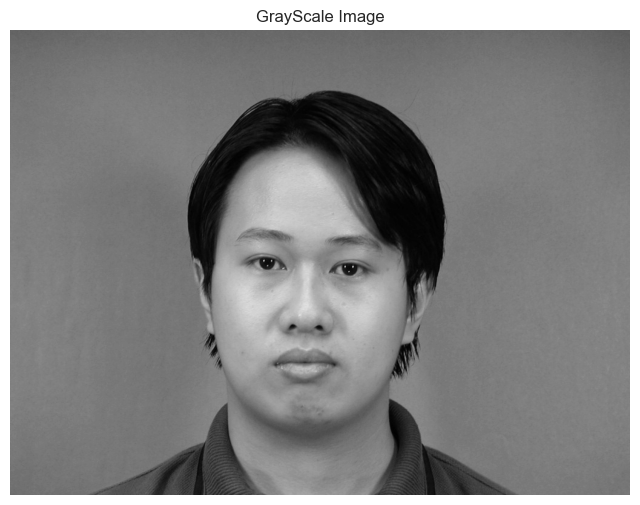

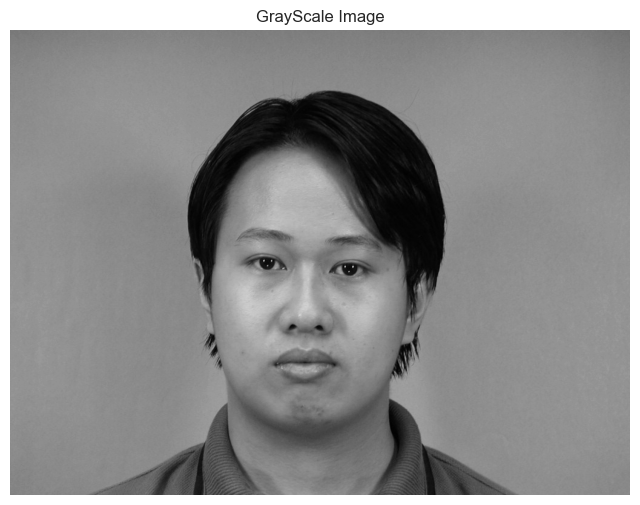

In [51]:
import cv2
import matplotlib.pyplot as plt
plt.style.use('seaborn')

img = cv2.imread(r'C:\Users\varun\Coding\Machine-learning\face_sketches\dataset2\photo\f-042-01.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

img_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(img_gray,cmap="gray")
plt.axis("off")

plt.title("GrayScale Image")
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(img_gray,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.show()

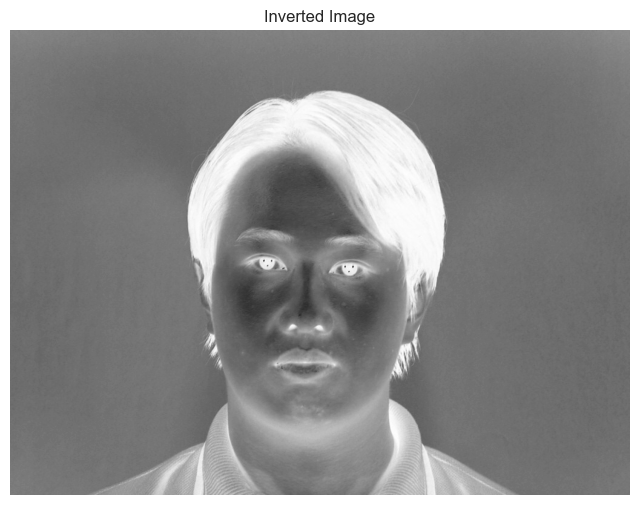

In [52]:
img_invert = cv2.bitwise_not(img_gray)
plt.figure(figsize=(8,8))
plt.imshow(img_invert,cmap="gray")
plt.axis("off")
plt.title("Inverted Image")
plt.show()

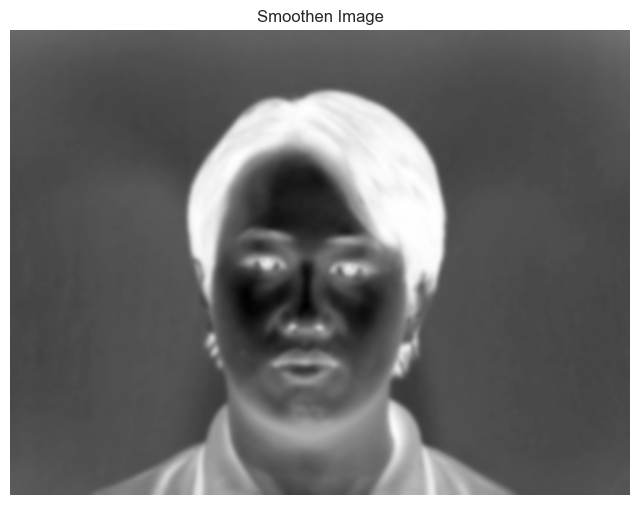

In [53]:
img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
plt.figure(figsize=(8,8))
plt.imshow(img_smoothing,cmap="gray")
plt.axis("off")
plt.title("Smoothen Image")
plt.show()

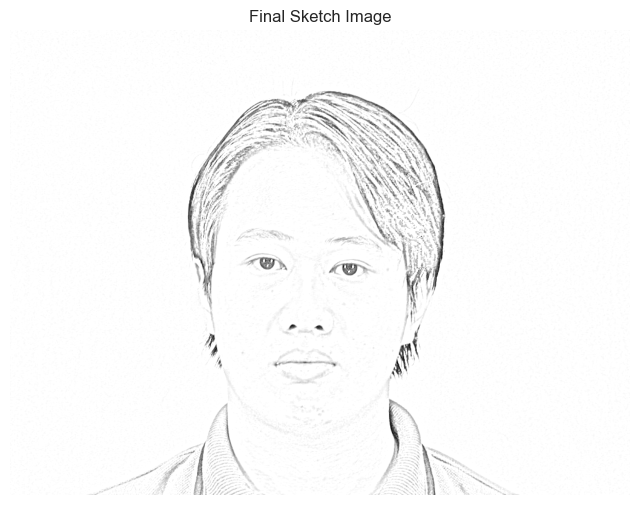

In [54]:
final = cv2.divide(img_gray, 255 - img_smoothing, scale=255)
plt.figure(figsize=(8,8))
plt.imshow(final,cmap="gray")
plt.axis("off")
plt.title("Final Sketch Image")
plt.show()

In [86]:
def img2sketch(photo, filename, k_size):
    #Read Image
    img=cv2.imread(photo)
    
    # Convert to Grey Image
    grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert Image
    invert_img=cv2.bitwise_not(grey_img)
    #invert_img=255-grey_img

    # Blur image
    blur_img=cv2.GaussianBlur(invert_img, (k_size,k_size),0)

    # Invert Blurred Image
    invblur_img=cv2.bitwise_not(blur_img)
    #invblur_img=255-blur_img

    # Sketch Image
    sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)
    sketch_img = cv2.resize(sketch_img,dsize=(512, 512))
    # Save Sketch 
    loc = 'C:/Users/varun/Coding/Machine-learning/face_sketches/dataset3/synthetic_sketches/'
    cv2.imwrite(loc + filename, sketch_img)

# filename = 'converted_image3.png'
# photo=r'C:\Users\varun\Coding\Machine-learning\face_sketches\dataset2\photo\m1-032-01.jpg'
# #Function call
# img2sketch(photo, filename, k_size=79)

In [87]:
from PIL import Image
from os import listdir

photo_path = 'C:/Users/varun/Coding/Machine-learning/face_sketches/dataset3/photo/'
for filename in listdir(photo_path):
    img2sketch(photo_path+filename, filename, k_size=79)

In [90]:
photo_path = 'C:/Users/varun/Coding/Machine-learning/face_sketches/dataset3/photo/'
for filename in listdir(photo_path):
    img=cv2.imread(photo_path+filename)
    img = cv2.resize(img,dsize=(256, 256))
    loc = 'C:/Users/varun/Coding/Machine-learning/face_sketches/dataset3/photo/'
    cv2.imwrite(loc + filename, img)

In [92]:
photo_path = 'C:/Users/varun/Coding/Machine-learning/face_sketches/dataset3/synthetic_sketches/'
for filename in listdir(photo_path):
    img=cv2.imread(photo_path+filename)
    img = cv2.resize(img,dsize=(256, 256))
    loc = 'C:/Users/varun/Coding/Machine-learning/face_sketches/dataset3/synthetic_sketches/'
    cv2.imwrite(loc + filename, img)

In [ ]:
_